**NLP Project for Disaster Tweet Classification**

Part 1: Data Exploration and Preparation


In [228]:
# first import all important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [229]:
# import dataset
df = pd.read_csv("twitter_disaster (1).csv")

In [230]:
# check out forst few rows
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [231]:
# shape of data
df.shape

(7613, 5)

In [232]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

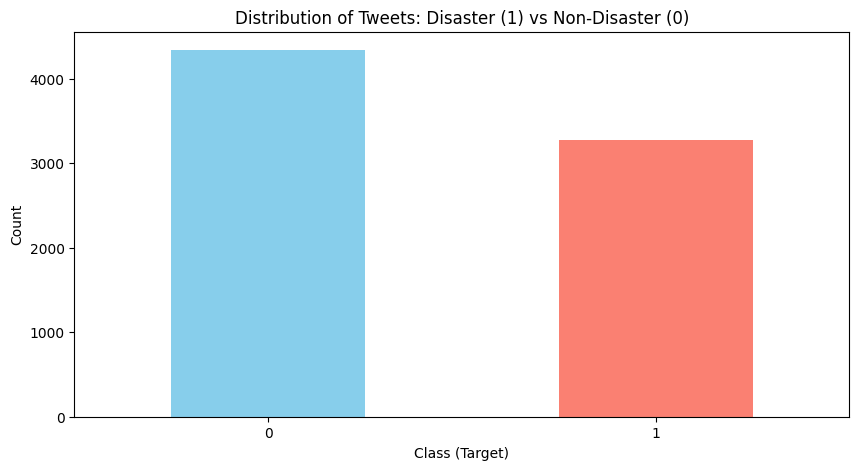

In [233]:
# Visualize the distribution of classes
# Plot distribution of target variable
plt.figure(figsize=(10,5))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Tweets: Disaster (1) vs Non-Disaster (0)")
plt.xlabel("Class (Target)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [234]:
#Analyze frequency of words
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [235]:
# Filter only disaster tweets
disaster_tweets = df[df['target'] == 1]

In [236]:
# 1) Keyword frequency
keyword_counts = disaster_tweets['keyword'].value_counts().dropna().head(15)

C:\Users\santy\AppData\Local\Temp\ipykernel_17412\3393759134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_counts.values, y=keyword_counts.index, palette="Reds_r")


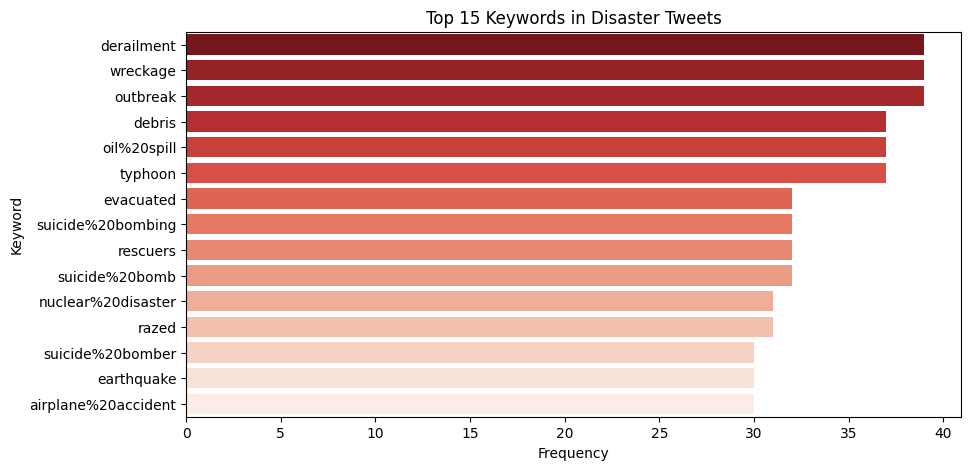

In [237]:
# plot
plt.figure(figsize=(10,5))
sns.barplot(x=keyword_counts.values, y=keyword_counts.index, palette="Reds_r")
plt.title("Top 15 Keywords in Disaster Tweets")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.show()

In [238]:
# 2) Phrase/word frequency
from sklearn.feature_extraction.text import CountVectorizer

In [239]:
# Use CountVectorizer for unigrams and bigrams
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=30)
X = vectorizer.fit_transform(disaster_tweets['text'])
phrases = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

In [240]:
# Plot top phrases
phrase_freq = pd.DataFrame({'phrase': phrases, 'count': counts}).sort_values(by="count", ascending=False)


C:\Users\santy\AppData\Local\Temp\ipykernel_17412\3907173949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="phrase", data=phrase_freq.head(15), palette="Blues_r")


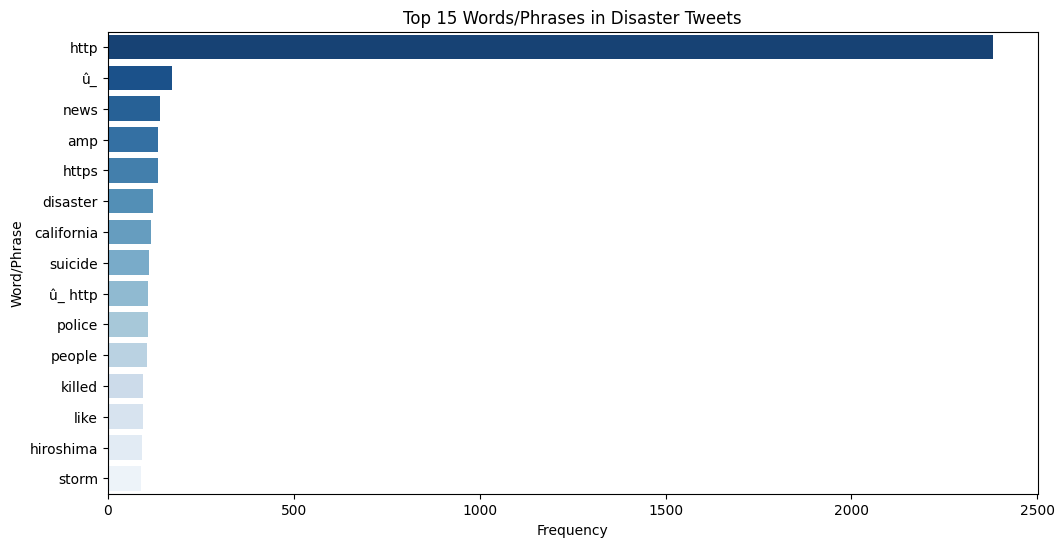

In [241]:
# plot
plt.figure(figsize=(12,6))
sns.barplot(x="count", y="phrase", data=phrase_freq.head(15), palette="Blues_r")
plt.title("Top 15 Words/Phrases in Disaster Tweets")
plt.xlabel("Frequency")
plt.ylabel("Word/Phrase")
plt.show()

In [242]:
# 3) Word cloud for disaster tweets
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(disaster_tweets['text']))

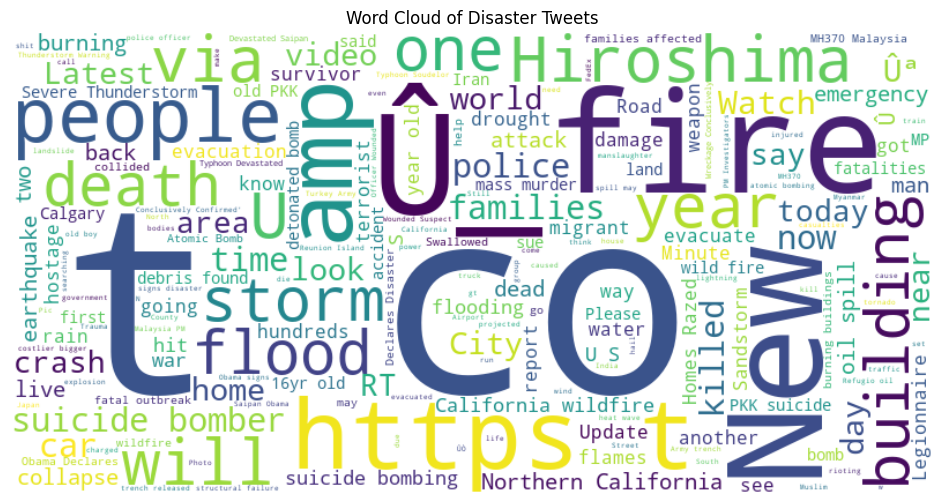

In [243]:
# plot
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Disaster Tweets")
plt.show()

**`Data Preperation`**


In [244]:
# Clean the text data
import re


In [245]:
# function to clean tesxt
def clean_text(text):
    text = str(text).lower()                          # convert to lowercase
    text = re.sub(r'http\S+|www.\S+', '', text)       # remove URLs
    text = re.sub(r'@\w+', '', text)                  # remove mentions
    text = re.sub(r'#', '', text)                     # remove hashtag symbol but keep word
    text = re.sub(r'[^a-z0-9\s]', '', text)           # remove special chars & punctuation
    text = re.sub(r'\s+', ' ', text).strip()          # remove extra spaces
    return text

In [246]:
# Apply cleaning to text column
df['clean_text'] = df['text'].apply(clean_text)

In [247]:
# Show original vs cleaned samples
print(df[['text', 'clean_text']].head(10))

                                                text  \
0  Our Deeds are the Reason of this #earthquake M...   
1             Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are ...   
3  13,000 people receive #wildfires evacuation or...   
4  Just got sent this photo from Ruby #Alaska as ...   
5  #RockyFire Update => California Hwy. 20 closed...   
6  #flood #disaster Heavy rain causes flash flood...   
7  I'm on top of the hill and I can see a fire in...   
8  There's an emergency evacuation happening now ...   
9  I'm afraid that the tornado is coming to our a...   

                                          clean_text  
0  our deeds are the reason of this earthquake ma...  
1              forest fire near la ronge sask canada  
2  all residents asked to shelter in place are be...  
3  13000 people receive wildfires evacuation orde...  
4  just got sent this photo from ruby alaska as s...  
5  rockyfire update california hwy 20 closed in b... 

In [248]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [249]:
# Tokenize the cleaned text
# nltk.download('punkt') # Skipping this step due to persistent LookupError with punkt_tab
# df['tokens'] = df['clean_text'].apply(word_tokenize) # Skipping this step as subsequent vectorizers handle tokenization

In [250]:
# Show a few examples
# print(df[['clean_text', 'tokens']].head(10)) # Skipping this due to removal of 'tokens' column creation

In [251]:
#Split the dataset into training and testing sets for model development
from sklearn.model_selection import train_test_split


In [252]:
# Features (tweets) and labels (target)
X = df['clean_text']   # input features
y = df['target']       # labels (0 = non-disaster, 1 = disaster)

In [253]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 6090
Testing set size: 1523


Part 2: Feature Engineering and Model selection

In [254]:
# 1) BAG OF WORDS
from sklearn.feature_extraction.text import CountVectorizer

In [255]:
# Bag of Words representation
bow_vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [256]:
print("BoW feature shape:", X_train_bow.shape)

BoW feature shape: (6090, 5000)


In [257]:
# 2) TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [258]:
# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [259]:
print("TF-IDF feature shape:", X_train_tfidf.shape)

TF-IDF feature shape: (6090, 5000)


In [260]:
# 3) Sentiment Features
from textblob import TextBlob

In [261]:
# Function to extract sentiment features
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

In [262]:
# Apply sentiment analysis
sentiment_train = np.array([get_sentiment(t) for t in X_train])
sentiment_test = np.array([get_sentiment(t) for t in X_test])

In [263]:

print("Sentiment feature example:", sentiment_train[:5])

Sentiment feature example: [[ 0.   0. ]
 [ 0.   0. ]
 [-0.4  0.4]
 [ 0.   0. ]
 [ 0.   0. ]]


In [264]:
"""
This gives two extra features per tweet:

Polarity (−1 = negative, +1 = positive).

Subjectivity (0 = objective, 1 = subjective).
"""

'\nThis gives two extra features per tweet:\n\nPolarity (−1 = negative, +1 = positive).\n\nSubjectivity (0 = objective, 1 = subjective).\n'

In [265]:
# combine features(TF-IDF and Sentiment)
from scipy.sparse import hstack

In [266]:
# Combine TF-IDF with sentiment
X_train_final = hstack([X_train_tfidf, sentiment_train])
X_test_final = hstack([X_test_tfidf, sentiment_test])

In [267]:

print("Final feature shape:", X_train_final.shape)


Final feature shape: (6090, 5002)


# Workflow with Word2Vec / GloVe

In [268]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [269]:
!unzip glove.twitter.27B.zip

unzip:  cannot find or open glove.twitter.27B.zip, glove.twitter.27B.zip.zip or glove.twitter.27B.zip.ZIP.


In [270]:
# Load the GloVe embeddings into a dictionary
embeddings_index = {}
with open('glove.twitter.27B.200d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors.')

FileNotFoundError: [Errno 2] No such file or directory: 'glove.twitter.27B.200d.txt'

In [ ]:
# Load GloVe embeddings (200-dimensional)
embeddings_index = {}
with open("glove.twitter.27B.200d.txt", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = vector

print("Loaded embeddings:", len(embeddings_index))

FileNotFoundError: [Errno 2] No such file or directory: 'glove.twitter.27B.200d.txt'

In [ ]:
#Tokenize & Pad Tweets
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert tweets into sequences
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences for equal length
max_len = 50
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [ ]:
# Embedding Matrix
word_index = tokenizer.word_index
embedding_dim = 200
embedding_matrix = np.zeros((len(word_index)+1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
# build Neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(len(word_index)+1,
              embedding_dim,
              weights=[embedding_matrix],
              input_length=max_len,
              trainable=False),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │     2,734,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,734,000 (10.43 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,734,000 (10.43 MB)

In [ ]:
# Train and evaluate
history = model.fit(X_train_pad, y_train,
                    validation_data=(X_test_pad, y_test),
                    epochs=5, batch_size=64)

loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.5703 - loss: 0.6909 - val_accuracy: 0.5706 - val_loss: 0.6889
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.5703 - loss: 0.6877 - val_accuracy: 0.5706 - val_loss: 0.6864
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.5703 - loss: 0.6858 - val_accuracy: 0.5706 - val_loss: 0.6850
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.5703 - loss: 0.6846 - val_accuracy: 0.5706 - val_loss: 0.6841
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.5703 - loss: 0.6840 - val_accuracy: 0.5706 - val_loss: 0.6837
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5706 - loss: 0.6837
Test Accuracy: 0.5705843567848206


In [ ]:
# to boost performance
# Function to extract additional features
def extract_additional_features(texts):
    features = []
    for t in texts:
        t = str(t)
        word_count = len(t.split())
        char_count = len(t)
        hashtag_count = t.count("#")
        mention_count = t.count("@")
        url_count = t.count("http")

        features.append([word_count, char_count, hashtag_count, mention_count, url_count])
    return np.array(features)

# Apply to train and test
train_extra = extract_additional_features(X_train)
test_extra = extract_additional_features(X_test)

print("Extra feature shape:", train_extra.shape)
print("Sample features:", train_extra[:5])

Extra feature shape: (6090, 5)
Sample features: [[13 90  0  0  0]
 [14 82  0  0  0]
 [14 85  0  0  0]
 [ 5 28  0  0  0]
 [13 79  0  0  0]]


In [ ]:
# combine with text featires
from scipy.sparse import hstack

# Example: combine TF-IDF features with handcrafted features
X_train_final = hstack([X_train_tfidf, train_extra])
X_test_final = hstack([X_test_tfidf, test_extra])

print("Final feature shape:", X_train_final.shape)

Final feature shape: (6090, 5005)


# Task: Model Selection and Training

In [ ]:
# import all libraries
!pip install xgboost
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# apply all models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "MLP Neural Net": MLPClassifier(hidden_layer_sizes=(128,64), max_iter=10)
}

In [ ]:
# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# check scores
scoring = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score)
}

In [ ]:
# Evaluate each model
results = {}
for name, model in models.items():
    scores = {}
    for metric, scorer in scoring.items():
        cv_scores = cross_val_score(model, X_train_final, y_train, cv=cv, scoring=scorer, n_jobs=-1)
        scores[metric] = np.mean(cv_scores)
    results[name] = scores

In [ ]:
# Display results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



Logistic Regression:
  accuracy: 0.7821
  precision: 0.7527
  recall: 0.7352
  f1: 0.7436

Naive Bayes:
  accuracy: 0.7844
  precision: 0.8713
  recall: 0.5850
  f1: 0.6997

Random Forest:
  accuracy: 0.7803
  precision: 0.8322
  recall: 0.6125
  f1: 0.7052

XGBoost:
  accuracy: 0.7719
  precision: 0.8209
  recall: 0.6007
  f1: 0.6933

MLP Neural Net:
  accuracy: 0.7745
  precision: 0.7423
  recall: 0.6377
  f1: 0.7385


# Hyper parameter tunnig


In [ ]:
# importing libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# Logistic Regression
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}
grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000, class_weight="balanced"),
    param_grid=param_grid_lr,
    cv=3,
    scoring="f1",
    n_jobs=-1
)
grid_lr.fit(X_train, y_train)
print("Best Logistic Regression:", grid_lr.best_params_, "F1:", grid_lr.best_score_)

ValueError: 
All the 48 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1222, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\series.py", line 953, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'the sound of arson'

--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1222, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\series.py", line 953, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'sassy city girl country hunk stranded in smoky mountain snowstorm aoms ibooklove bookboost'


In [ ]:
#  Random Forest
param_grid_rf = {
    "n_estimators": [100, 200, 500],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
random_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=3,
    scoring="f1",
    n_jobs=-1,
    random_state=42
)
random_rf.fit(X_train_final, y_train)
print("Best Random Forest:", random_rf.best_params_, "F1:", random_rf.best_score_)

Best Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None} F1: 0.6917088429323254


In [ ]:
# XGBoost
param_grid_xgb = {
    "n_estimators": [100, 200, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}
random_xgb = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    param_distributions=param_grid_xgb,
    n_iter=10,
    cv=3,
    scoring="f1",
    n_jobs=-1,
    random_state=42
)
random_xgb.fit(X_train_final, y_train)
print("Best XGBoost:", random_xgb.best_params_, "F1:", random_xgb.best_score_)


c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:20:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.8} F1: 0.7132817574588254


In [ ]:
# Neural Network (MLP)
param_grid_mlp = {
    "hidden_layer_sizes": [(64,), (128,), (128,64), (256,128)],
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate_init": [0.001, 0.01]
}
random_mlp = RandomizedSearchCV(
    MLPClassifier(max_iter=30, random_state=42),
    param_distributions=param_grid_mlp,
    n_iter=10,
    cv=3,
    scoring="f1",
    n_jobs=-1,
    random_state=42
)
random_mlp.fit(X_train_final, y_train)
print("Best MLP:", random_mlp.best_params_, "F1:", random_mlp.best_score_)

Best MLP: {'learning_rate_init': 0.001, 'hidden_layer_sizes': (64,), 'alpha': 0.01, 'activation': 'tanh'} F1: 0.7264479065541631


c:\Users\santy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


# Part 3: Model Evaluation and Validation

# Model Evaluation

In [ ]:
# importing libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Build pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# Parameter grid for LogisticRegression
param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

# Grid search with pipeline
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit
grid.fit(X_train, y_train)

# Best pipeline (vectorizer + classifier together)
best_model = grid.best_estimator_  # Example: Logistic Regression

In [ ]:
# Train on full training data
best_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('clf',
                 LogisticRegression(C=1, max_iter=1000, solver='liblinear'))])

In [ ]:
# Predict on test data
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.824688115561392
Precision: 0.8524590163934426
Recall: 0.7155963302752294
F1 Score: 0.7780548628428927

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       869
           1       0.85      0.72      0.78       654

    accuracy                           0.82      1523
   macro avg       0.83      0.81      0.82      1523
weighted avg       0.83      0.82      0.82      1523



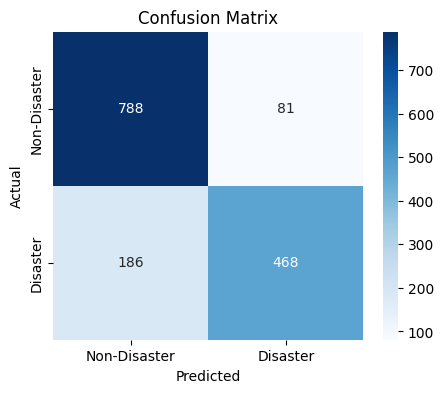

In [ ]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Disaster", "Disaster"], yticklabels=["Non-Disaster", "Disaster"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# checking for overfitting or underfitting
# Evaluate on training set
y_train_pred = best_model.predict(X_train_final)
train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

TypeError: 'coo_matrix' object is not subscriptable

In [ ]:
# Evaluate on test set
y_test_pred = best_model.predict(X_test_final)
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

TypeError: 'coo_matrix' object is not subscriptable

In [ ]:
print("Training Accuracy:", train_acc)
print("Training F1:", train_f1)
print("Testing Accuracy:", test_acc)
print("Testing F1:", test_f1)

Training Accuracy: 0.867487684729064
Training F1: 0.8441182151825382
Testing Accuracy: 0.7912015758371634
Testing F1: 0.759090909090909


In [ ]:
# Check difference
print("\nPerformance Gap (Train - Test):")
print("Accuracy Gap:", train_acc - test_acc)
print("F1 Gap:", train_f1 - test_f1)


Performance Gap (Train - Test):
Accuracy Gap: 0.07628610889190057
F1 Gap: 0.08502730609162912


In [ ]:
# Teat on noisy veriation of tweet
import random, re

def add_noise(tweet):
    # random typo
    tweet = re.sub(r"disaster", "disasster", tweet)
    # slang replacement
    tweet = tweet.replace("help", "hlp")
    # random hashtag
    tweet += " #" + random.choice(["omg", "breaking", "alert"])
    return tweet

sample_tweets = df['text'].sample(5, random_state=42).tolist()
for t in sample_tweets:
    print("Original:", t)
    print("Noisy   :", add_noise(t), "\n")

Original: So you have a new weapon that can cause un-imaginable destruction.
Noisy   : So you have a new weapon that can cause un-imaginable destruction. #breaking 

Original: The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@
Noisy   : The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@ #breaking 

Original: DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q
Noisy   : DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q #breaking 

Original: Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night.
Noisy   : Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night. #alert 

Original: in respon

In [ ]:
# Teat on noisy veriation of tweet
import random, re

def add_noise(tweet):
    # random typo
    tweet = re.sub(r"disaster", "disasster", tweet)
    # slang replacement
    tweet = tweet.replace("help", "hlp")
    # random hashtag
    tweet += " #" + random.choice(["omg", "breaking", "alert"])
    return tweet

sample_tweets = df['text'].sample(5, random_state=42).tolist()
noisy_tweets = [add_noise(t) for t in sample_tweets]

# Clean the noisy tweets using the existing clean_text function
noisy_clean_tweets = [clean_text(t) for t in noisy_tweets]

# Transform the noisy tweets using the same vectorizer and extra feature extraction
# Assuming tfidf_vectorizer and extract_additional_features are available from previous steps
noisy_tfidf = tfidf_vectorizer.transform(noisy_clean_tweets)
noisy_extra = extract_additional_features(noisy_clean_tweets)

# Combine features (assuming the model was trained on TF-IDF and extra features)
noisy_features = hstack([noisy_tfidf, noisy_extra])

# Predict on noisy data
noisy_preds = best_model.predict(noisy_features)

for i, tweet in enumerate(sample_tweets):
    print("Original:", tweet)
    print("Noisy   :", noisy_tweets[i])
    print("Prediction:", "Disaster" if noisy_preds[i] == 1 else "Non-Disaster", "\n")

Original: So you have a new weapon that can cause un-imaginable destruction.
Noisy   : So you have a new weapon that can cause un-imaginable destruction. #alert
Prediction: Non-Disaster 

Original: The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@
Noisy   : The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@ #breaking
Prediction: Non-Disaster 

Original: DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q
Noisy   : DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q #breaking
Prediction: Disaster 

Original: Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night.
Noisy   : Aftershock back to school kick off was great. I want to thank everyone for 

In [ ]:
# checking results
df['tweet_length'] = df['clean_text'].apply(len)
df['sentiment'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Group performance by bins
length_bins = pd.cut(df['tweet_length'], bins=[0,50,100,200,300], labels=["short","med","long","very long"])
print("Performance by Tweet Length:")
print(pd.crosstab(length_bins, df['target']))


Performance by Tweet Length:
target           0     1
tweet_length            
short         1126   436
med           2095  1728
long          1121  1107


In [ ]:
from flask import Flask, render_template, request
import pickle

NameError: name 'app' is not defined

In [ ]:


# Load vectorizer
with open("tfidf_vectorizer.pkl", "rb") as vec_file:
    vectorizer = pickle.load(vec_file)

FileNotFoundError: [Errno 2] No such file or directory: 'tfidf_vectorizer.pkl'